In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [5]:

# cfg_name,model,exptype,diffinit,t,setting,attack_acc_with_same_ri,epsilon_with_same_ri,attack_acc_with_diff_ri,epsilon_with_diff_ri

input_file = 'all_newmi_results.csv'

def get_dataframe(model, setting):
    df = pd.read_csv(input_file)

    # Select only models for the specified models/task
    df = df.query("cfg_name == '{}'".format(model))

    # # Select only models extracted using specified setting
    df = df.query("setting == '{}'".format(setting))

    df = pd.melt(df, id_vars=['exptype'], value_vars=['epsilon_with_same_ri','epsilon_with_diff_ri'])

    df.set_index('exptype')

    return df




In [6]:
# Plot the figure

def plot_graph(df):
    fig, ax = plt.figure(), plt.axes()
    plot = sns.lineplot(data=df, x='exptype', y='value', hue='variable', style='variable', dashes=True, marker='o', ax=ax)

    plot.set(xlabel="Experiment Type",  ylabel="Epsilon")

    plot.set_title('Lower bound Epsilon using MI attack')
    ax.legend(loc='lower right', labels=['Same Replace-Idx','Diff Replace-Idx'])
    plt.legend(fontsize=15)
    plt.tight_layout()
    # plt.savefig(output_file)
    plt.show()

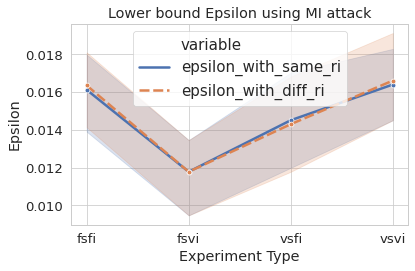

In [4]:
df = get_dataframe('mnist_binary_lr', 'bolton')
plot_graph(df)

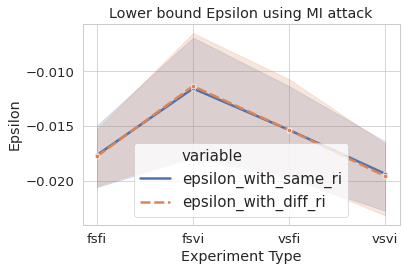

In [5]:
df = get_dataframe('mnist_binary_lr', 'noiseless')
plot_graph(df)

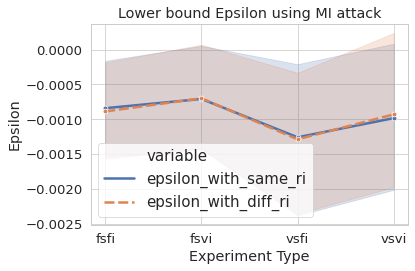

In [9]:
df = get_dataframe('adult_lr', 'noiseless')
plot_graph(df)

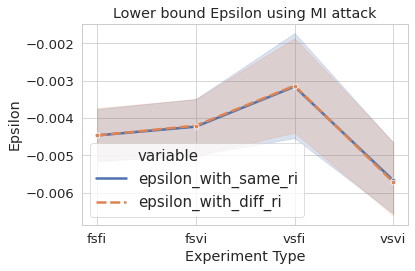

In [8]:
df = get_dataframe('adult_lr', 'bolton')
plot_graph(df)

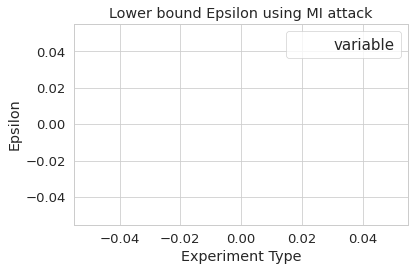

In [7]:
df = get_dataframe('mnist_binary_mlp', 'noiseless')
plot_graph(df)

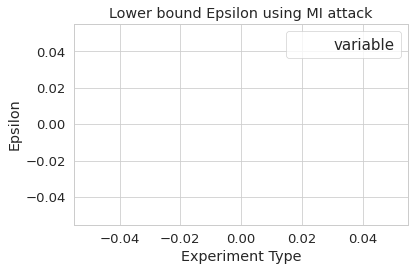

In [8]:
df = get_dataframe('mnist_square_mlp', 'noiseless')
plot_graph(df)

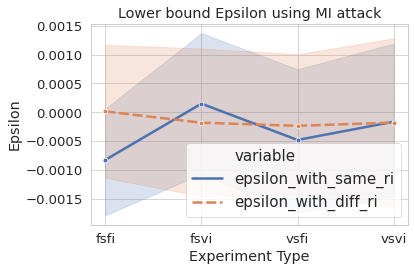

In [9]:
df = get_dataframe('adult_mlp', 'noiseless')
plot_graph(df)

In [ ]:
df = get_dataframe('adult_mlp', 'bolton')
plot_graph(df)

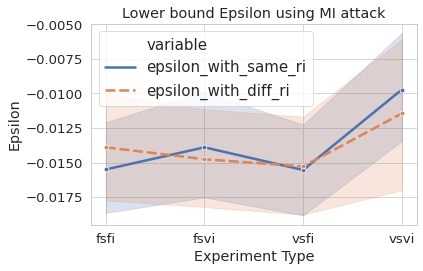

In [10]:
df = get_dataframe('cifar2_mlp', 'noiseless')
plot_graph(df)

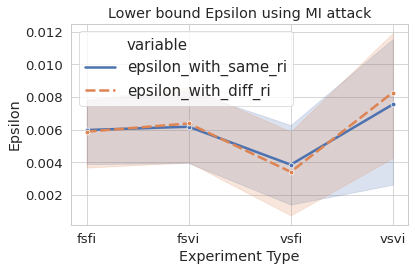

In [11]:
df = get_dataframe('cifar2_mlp', 'bolton')
plot_graph(df)